<a href="https://colab.research.google.com/github/ShashiBhushanRaj/AI-ML/blob/main/Project1_BayesClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
iris=sns.load_dataset('iris')

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
x=iris.petal_length

In [ ]:
x.shape

(150,)

In [ ]:
y=iris.species

In [ ]:
y.shape

(150,)

In [ ]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
y[y=='setosa']='0'
y[y=='versicolor']='1'
y[y=='virginica']='2'

/tmp/ipython-input-13-1363614106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y=='setosa']='0'
/tmp/ipython-input-13-1363614106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y=='versicolor']='1'
/tmp/ipython-input-13-1363614106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y=='virginica']='2'


In [ ]:
y.unique()

array(['0', '1', '2'], dtype=object)

In [ ]:
x


,petal_length
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4
...,...
145,5.2
146,5.0
147,5.2
148,5.4


In [ ]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
idx=np.random.permutation(np.arange(y.size))
ntrain=120
ntest=idx.size-ntrain
xtrain=x[idx[:ntrain]]
ytrain=y[idx[:ntrain]]
xtest=x[idx[ntrain:]]
ytest=y[idx[ntrain:]]

In [ ]:
ytrain.size

120

In [ ]:
ytest.size

30

In [ ]:
py=np.zeros(3)

In [ ]:
py[0]=(ytrain=='0').sum()/ytrain.size
py[1]=(ytrain=='1').sum()/ytrain.size
py[2]=(ytrain=='2').sum()/ytrain.size


In [ ]:
py

array([0.36666667, 0.275     , 0.35833333])

In [ ]:
fx_given_y=[[0,0],[0,0],[0,0]]

In [ ]:
x_0=xtrain[ytrain=='0']
x_1=xtrain[ytrain=='1']
x_2=xtrain[ytrain=='2']
mu_0=x_0.mean()
mu_1=x_1.mean()
mu_2=x_2.mean()
sigma_0=x_0.std()
sigma_1=x_1.std()
sigma_2=x_2.std()
fx_given_y[0][0]=mu_0
fx_given_y[0][1]=sigma_0
fx_given_y[1][0]=mu_1
fx_given_y[1][1]=sigma_1
fx_given_y[2][0]=mu_2
fx_given_y[2][1]=sigma_2


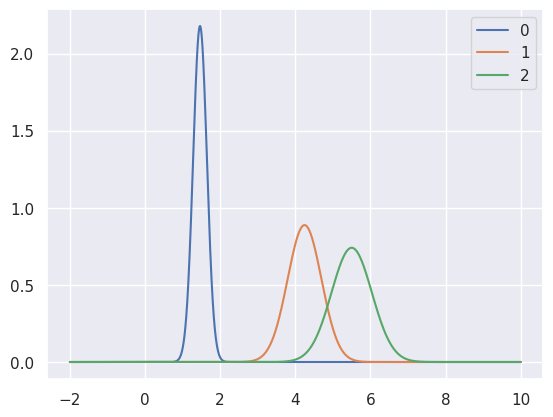

In [ ]:
x2=np.linspace(-2,10,10000)
sns.set()
for i in range(3):
  mu=fx_given_y[i][0]
  sgma=fx_given_y[i][1]
  fx=np.exp((-(x2-mu)**2)/(2*sgma**2))/(2*np.pi*sgma**2)**0.5
  plt.plot(x2,fx,label=str(i))
plt.legend()


In [ ]:
xtest=np.asarray(xtest)
ytest=np.asarray(ytest)

In [ ]:
xt=xtest[0]

In [ ]:
print(xt)

1.3


In [ ]:
i=0
mu=fx_given_y[i][0]
sigma=fx_given_y[i][1]
py_0_given_x=py[0]*np.exp((-(xt-mu)**2)/(2*sgma**2))/(2*np.pi*sgma**2)**0.5


In [ ]:
py_0_given_x

np.float64(0.2593775742537463)

In [ ]:

i=1
mu=fx_given_y[i][0]
sigma=fx_given_y[i][1]
py_1_given_x=py[0]*np.exp((-(xt-mu)**2)/(2*sgma**2))/(2*np.pi*sgma**2)**0.5


In [ ]:
i=2
mu=fx_given_y[i][0]
sigma=fx_given_y[i][1]
py_2_given_x=py[0]*np.exp((-(xt-mu)**2)/(2*sgma**2))/(2*np.pi*sgma**2)**0.5


In [ ]:
print(py_0_given_x,py_1_given_x,py_2_given_x)

0.2593775742537463 8.66480619834375e-08 1.6805056569383665e-14


In [ ]:
ytest[0]

'0'